**DATA PREPROCESSING**

In [282]:
import pandas as pd

In [283]:
import warnings
warnings.filterwarnings("ignore")

#Load Data and Display Summary-Statistics

In [284]:
train_data=pd.read_csv("/content/train (1).csv")

In [285]:
train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Survived
0,1,2,Passenger_1,female,3,0,2,55.88,1
1,2,3,Passenger_2,male,73,1,0,38.90,0
2,3,3,Passenger_3,female,8,3,0,38.61,0
3,4,3,Passenger_4,female,70,3,1,83.71,0
4,5,1,Passenger_5,male,41,0,0,79.98,1


In [286]:
test_data=pd.read_csv("/content/test.csv")

In [287]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,801,2,Passenger_801,male,58,1,0,76.42
1,802,3,Passenger_802,female,78,2,1,60.89
2,803,3,Passenger_803,female,75,1,1,25.20
3,804,2,Passenger_804,female,42,3,2,14.22
4,805,2,Passenger_805,female,38,2,0,11.10


In [288]:
submission_data=pd.read_csv("/content/submission.csv")

In [289]:
submission_data.head()

,PassengerId,Survived
0,801,0
1,802,0
2,803,0
3,804,0
4,805,0


In [290]:
train_data.shape

(800, 9)

In [291]:
test_data.shape

(200, 8)

In [292]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  800 non-null    int64  
 1   Pclass       800 non-null    int64  
 2   Name         800 non-null    object 
 3   Sex          800 non-null    object 
 4   Age          800 non-null    int64  
 5   SibSp        800 non-null    int64  
 6   Parch        800 non-null    int64  
 7   Fare         800 non-null    float64
 8   Survived     800 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 56.4+ KB


In [293]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  200 non-null    int64  
 1   Pclass       200 non-null    int64  
 2   Name         200 non-null    object 
 3   Sex          200 non-null    object 
 4   Age          200 non-null    int64  
 5   SibSp        200 non-null    int64  
 6   Parch        200 non-null    int64  
 7   Fare         200 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 12.6+ KB


In [294]:
for i in train_data.columns:
  print(i)

PassengerId
Pclass
Name
Sex
Age
SibSp
Parch
Fare
Survived


In [295]:
for i in test_data.columns:
  print(i)

PassengerId
Pclass
Name
Sex
Age
SibSp
Parch
Fare


In [296]:
train_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,2.286250,37.977500,1.476250,0.972500,51.948162,0.38000
std,231.0844,0.807853,22.765485,1.129615,0.821637,27.302592,0.48569
min,1.0000,1.000000,1.000000,0.000000,0.000000,5.060000,0.00000
25%,200.7500,2.000000,19.000000,0.000000,0.000000,27.547500,0.00000
50%,400.5000,3.000000,36.000000,2.000000,1.000000,51.375000,0.00000
75%,600.2500,3.000000,58.000000,2.000000,2.000000,76.290000,1.00000
max,800.0000,3.000000,79.000000,3.000000,2.000000,99.960000,1.00000


In [297]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,900.500000,2.240000,43.540000,1.565000,1.025000,51.492850
std,57.879185,0.790903,21.808864,1.068402,0.835383,28.019405
min,801.000000,1.000000,1.000000,0.000000,0.000000,5.220000
25%,850.750000,2.000000,25.000000,1.000000,0.000000,26.227500
50%,900.500000,2.000000,44.000000,2.000000,1.000000,51.210000
75%,950.250000,3.000000,61.250000,2.000000,2.000000,75.302500
max,1000.000000,3.000000,79.000000,3.000000,2.000000,99.840000


**DATA CLEANING**

handling missing values

In [298]:
train_data.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Survived,0


In [299]:
test_data.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


In [300]:
for i in test_data.columns:
  if test_data[i].isna().sum()!=0:
    if test_data[i].dtype=='object':
      test_data[i]=test_data[i].fillna(test_data[i].mode(),inplace=True)
    else:
      test_data[i]=test_data[i].fillna(test_data[i].mean(),inplace=True)
  else:
    continue

In [301]:
for i in train_data.columns:
  if train_data[i].isna().sum()!=0:
    if train_data[i].dtype=='object':
      train_data[i]=train_data[i].fillna(train_data[i].mode(),inplace=True)
    else:
      train_data[i]=train_data[i].fillna(train_data[i].mean(),inplace=True)
  else:
    continue


handling dulicated values

In [302]:
train_data.duplicated().sum()

0

In [303]:
test_data.duplicated().sum()

0

In [304]:
#no duplicates
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

handling outliers

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt

box plot

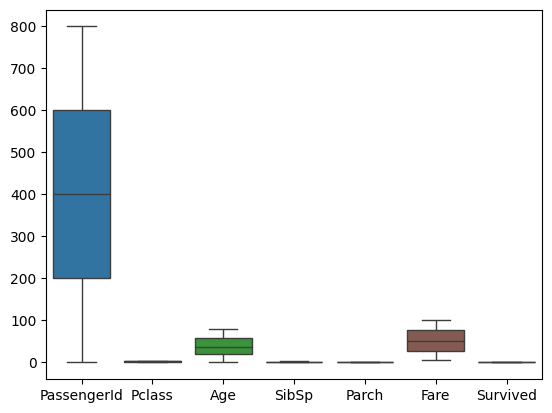

In [306]:
sns.boxplot(data=train_data)
plt.show()

<Axes: >

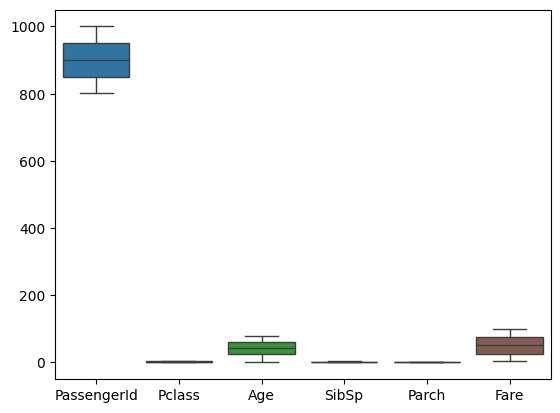

In [307]:
sns.boxplot(data=test_data)


In [308]:
train_num=train_data.select_dtypes(include="number")

In [309]:
for i in train_data.columns:
  if train_data[i].dtype=='object':
    continue
  else:
    q1=train_data[i].quantile(0.25)
    q3=train_data[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    train_data[i]=train_data[i].clip(lower=lower_bound,upper=upper_bound)


In [310]:
for i in test_data.columns:
  if test_data[i].dtype=="object":
    continue
  else:
    q1=test_data[i].quantile(0.25)
    q3=test_data[i].quantile(0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    up=q3+1.5*iqr
    test_data[i]=test_data[i].clip(lower=lb,upper=up)


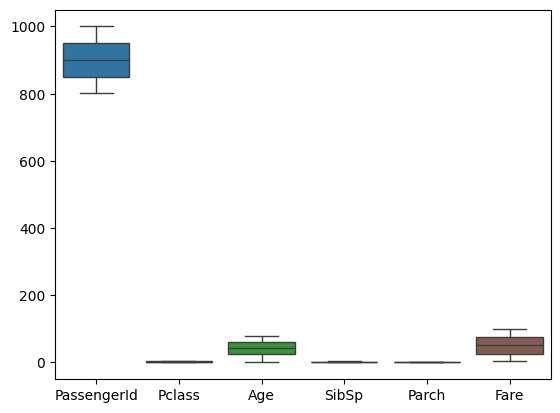

In [311]:
sns.boxplot(data=test_data)
plt.show()

<Axes: >

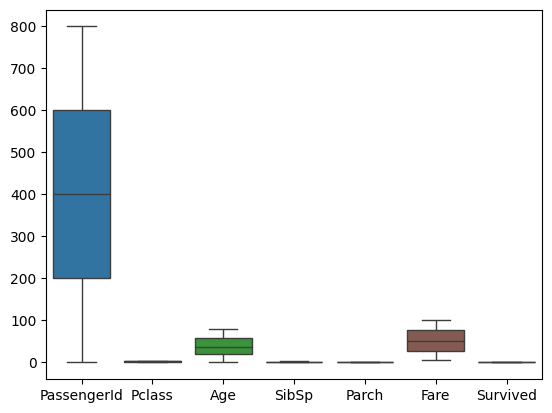

In [312]:
sns.boxplot(train_data)

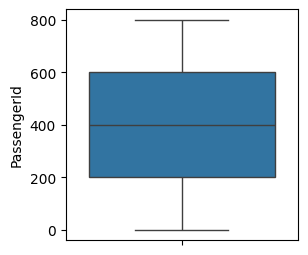

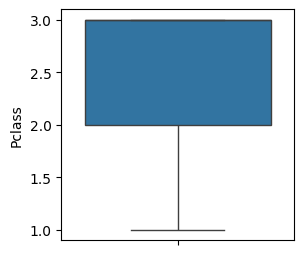

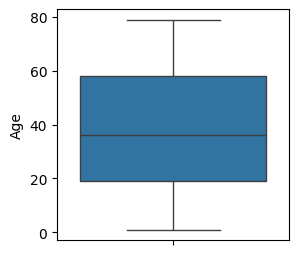

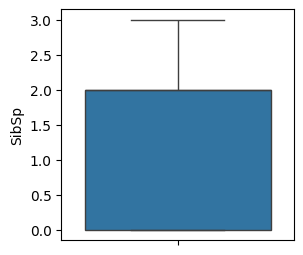

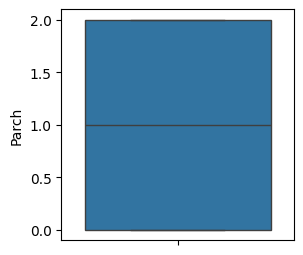

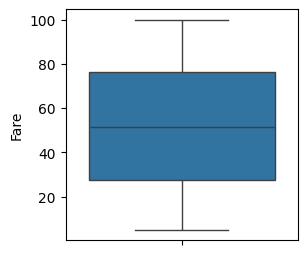

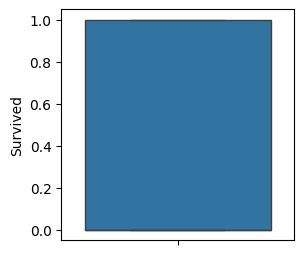

In [313]:
for i in train_data.columns:
  if train_data[i].dtype !='object':
    plt.figure(figsize=(3,3))
    sns.boxplot(train_data[i])
    plt.show()

In [314]:
num_train_data=train_data.select_dtypes(include="number")
num_test_data=test_data.select_dtypes(include="number")

In [315]:
num_train_data.skew()

,0
PassengerId,0.000000
Pclass,-0.565344
Age,0.107445
SibSp,0.001657
Parch,0.050934
Fare,0.017067
Survived,0.495381


In [316]:
num_test_data.skew()

,0
PassengerId,0.000000
Pclass,-0.455440
Age,-0.195267
SibSp,-0.058686
Parch,-0.047180
Fare,0.072683


handle skewness

In [317]:
import numpy as np

In [318]:

from scipy.stats import boxcox

def removeskew(data):
    n_data = data.select_dtypes(include="number")  # Select only numeric columns
    skewness = n_data.skew()

    for i in skewness.index:  # Iterate through column names
        if 0.5< skewness[i] < 1:  # Mild positive skew
            print("0.5-1",i)
            data[i] = np.log1p(data[i])  # Log transform
        elif  -1< skewness[i] <-0.5:  # Mild negative skew
            data[i] = np.square(data[i])  # Square root transformation
        elif skewness[i] <= -1:  # High negative skew
            print("-1<=",i)
            data[i] = np.cbrt(data[i])  # Cube root transformation (safer than exp)
        elif skewness[i] > 1:  # High positive skew
            print("1>=",i)
            data[i], _ = boxcox(data[i] + 1)  # Box-Cox requires positive values

    return data


In [319]:
train_data=removeskew(train_data)
#

In [320]:
test_data=removeskew(test_data)

In [321]:
num_train_data=train_data.select_dtypes(include="number")
num_test_data=test_data.select_dtypes(include="number")
num_train_data.skew()

,0
PassengerId,0.000000
Pclass,-0.325697
Age,0.107445
SibSp,0.001657
Parch,0.050934
Fare,0.017067
Survived,0.495381


In [322]:
num_test_data.skew()

,0
PassengerId,0.000000
Pclass,-0.455440
Age,-0.195267
SibSp,-0.058686
Parch,-0.047180
Fare,0.072683


rechecking

In [323]:
train_data.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Survived,0


In [324]:
train_data.duplicated().sum()

0

In [325]:
test_data.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


In [326]:
test_data.duplicated().sum()

0

DATA EXPLORATION

In [327]:
train_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,800.0000,800.00000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,5.87875,37.977500,1.476250,0.972500,51.948162,0.38000
std,231.0844,3.35382,22.765485,1.129615,0.821637,27.302592,0.48569
min,1.0000,1.00000,1.000000,0.000000,0.000000,5.060000,0.00000
25%,200.7500,4.00000,19.000000,0.000000,0.000000,27.547500,0.00000
50%,400.5000,9.00000,36.000000,2.000000,1.000000,51.375000,0.00000
75%,600.2500,9.00000,58.000000,2.000000,2.000000,76.290000,1.00000
max,800.0000,9.00000,79.000000,3.000000,2.000000,99.960000,1.00000


In [328]:
num_data=train_data.select_dtypes(include="number")

In [329]:
corr_train=num_data.corr()
corr_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,0.005711,0.059381,0.020979,0.041930,-0.012800,0.002565
Pclass,0.005711,1.000000,0.096612,0.026824,0.006964,-0.039760,-0.003181
Age,0.059381,0.096612,1.000000,0.057992,0.007193,0.014060,0.008019
SibSp,0.020979,0.026824,0.057992,1.000000,-0.045204,0.030837,-0.022310
Parch,0.041930,0.006964,0.007193,-0.045204,1.000000,0.018509,0.045037
Fare,-0.012800,-0.039760,0.014060,0.030837,0.018509,1.000000,-0.002315
Survived,0.002565,-0.003181,0.008019,-0.022310,0.045037,-0.002315,1.000000


<Axes: >

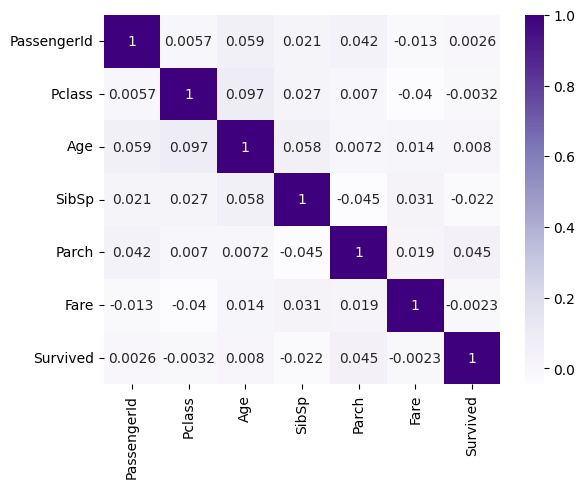

In [330]:
sns.heatmap(data=corr_train,cmap="Purples",annot=True)

<Axes: xlabel='Pclass', ylabel='count'>

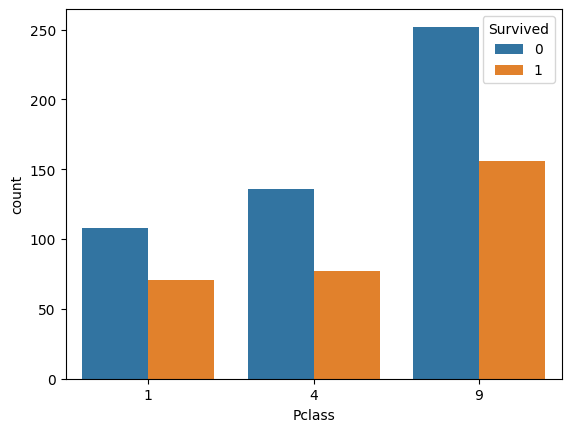

In [331]:
sns.countplot(data=train_data,x="Pclass",hue="Survived")

<Axes: xlabel='Age', ylabel='Count'>

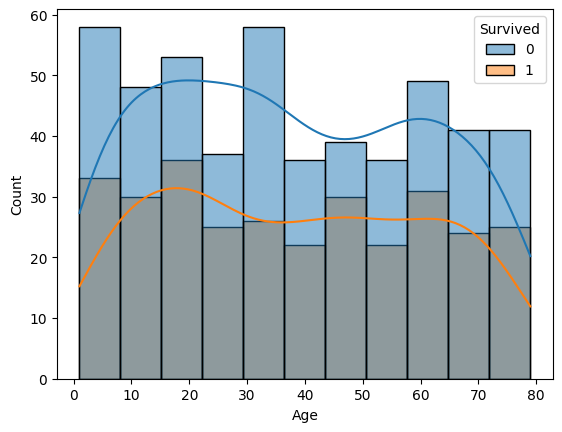

In [332]:
sns.histplot(data=train_data,x="Age",hue="Survived",kde=True)

<Axes: xlabel='Sex', ylabel='Age'>

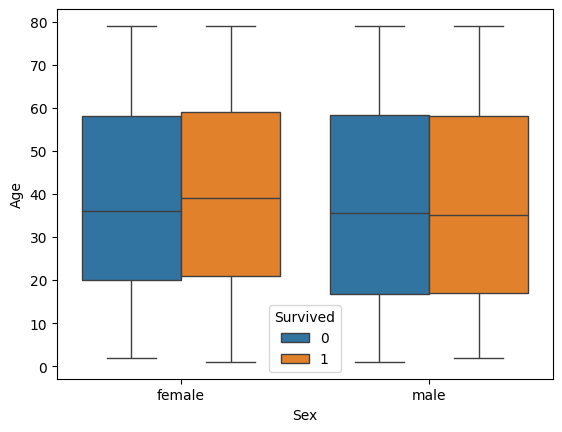

In [333]:
sns.boxplot(data=train_data,x="Sex",y="Age",hue="Survived")

In [334]:
train_data.drop(columns="PassengerId",inplace=True)


In [335]:
train_data.drop(columns="Name",inplace=True)
test_data.drop(columns="Name",inplace=True)

Sex
female    401
male      399
Name: count, dtype: int64


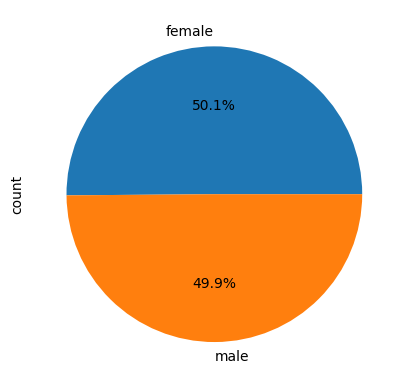

In [336]:
cat_train=train_data.select_dtypes(include="object")
for i in cat_train.columns:
  print(train_data[i].value_counts())
  train_data[i].value_counts().plot(kind="pie",autopct="%1.1f%%")

Sex
female    101
male       99
Name: count, dtype: int64


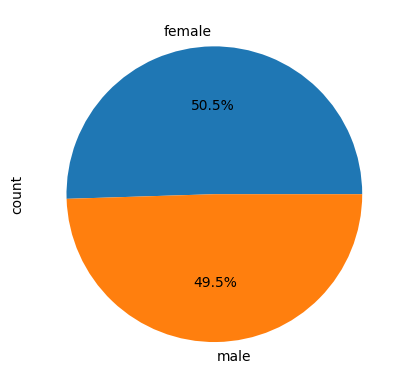

In [337]:
cat_test=test_data.select_dtypes(include="object")
for i in cat_test.columns:
  print(test_data[i].value_counts())
  test_data[i].value_counts().plot(kind="pie",autopct="%1.1f%%")

Encoding categorical data using one hot

In [338]:
train_data=pd.get_dummies(train_data,dtype=int,drop_first=True)
test_data=pd.get_dummies(test_data,dtype=int,drop_first=True)

In [339]:
train_data.head(2)

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male
0,4,3,0,2,55.88,1,0
1,9,73,1,0,38.90,0,1


In [340]:
test_data.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,801,2,58,1,0,76.42,1
1,802,3,78,2,1,60.89,0


In [341]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    800 non-null    int64  
 1   Age       800 non-null    int64  
 2   SibSp     800 non-null    int64  
 3   Parch     800 non-null    int64  
 4   Fare      800 non-null    float64
 5   Survived  800 non-null    int64  
 6   Sex_male  800 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 43.9 KB


In [342]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  200 non-null    int64  
 1   Pclass       200 non-null    int64  
 2   Age          200 non-null    int64  
 3   SibSp        200 non-null    int64  
 4   Parch        200 non-null    int64  
 5   Fare         200 non-null    float64
 6   Sex_male     200 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 11.1 KB


Check Class imbalance

In [343]:
X=train_data.drop(columns="Survived")
y=train_data["Survived"]

In [344]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [345]:
y_train.value_counts()

,count
Survived,
0,404
1,236


In [346]:
print(y_train.value_counts().max()/y_train.value_counts().min())


1.7118644067796611


handle imbalance using smote

In [347]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train,y_train)
print(y_resampled.value_counts())

Survived
1    404
0    404
Name: count, dtype: int64


FEATURE SELECTION

In [348]:
#we have X_resampled,y_resampled(train x and y) and test_data(only features no target
from sklearn.feature_selection import SelectKBest,f_classif
selector=SelectKBest(k=4,score_func=f_classif)
X_new=selector.fit_transform(X_resampled,y_resampled)
selected_features=X_resampled.columns[selector.get_support()]
X_test=X_test[selected_features]
X_unseen=test_data[selected_features]
print("Selected features are ",list(selected_features))

Selected features are  ['Pclass', 'SibSp', 'Parch', 'Sex_male']


Standardization of train ,test and unseen data

In [349]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_new=sc.fit_transform(X_new)
X_test=sc.transform(X_test)
X_unseen=sc.transform(X_unseen)


Model training

In [350]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


Logistic Regression

In [351]:
lr=LogisticRegression()
lr.fit(X_new,y_resampled)
y_pred_LR=lr.predict(X_test)
y_pred_LR

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0])

Decision Tree

In [352]:
dt=DecisionTreeClassifier()
dt.fit(X_new,y_resampled)
y_pred_DT=dt.predict(X_test)
y_pred_DT

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1])

RANDOM FOREST CLASSIFIER

In [353]:
rfc=RandomForestClassifier()
rfc.fit(X_new,y_resampled)
y_pred_RFC=rfc.predict(X_test)
y_pred_RFC

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1])

SUPPORT VECTOR CLASSIFIER

In [354]:
svc=SVC()
svc.fit(X_new,y_resampled)
y_pred_SVC=svc.predict(X_test)
y_pred_SVC

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1])

kneighbours

In [355]:
knc=KNeighborsClassifier()
knc.fit(X_new,y_resampled)
y_pred_KNC=knc.predict(X_test)
y_pred_KNC

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0])

MODEL EVALUATION AND COMPARISON

In [356]:
# Compare the performance of the five classification algorithms
print("\n\n************************************************************************\n")
print("\tLogistic Regression:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_LR))
print("Classification Report:")
print(classification_report(y_test, y_pred_LR))
print("\n************************************************************************\n")
print("\tDecision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_DT))
print("Classification Report:")
print(classification_report(y_test, y_pred_DT))
print("\n************************************************************************\n")
print("\tRandom Forest Classifier:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_RFC))
print("Classification Report:")
print(classification_report(y_test, y_pred_RFC))
print("\n************************************************************************\n")
print("\tSupport Vector Machine (SVM):\n")
print("Accuracy:", accuracy_score(y_test, y_pred_SVC))
print("Classification Report:")
print(classification_report(y_test, y_pred_SVC))
print("\n************************************************************************\n")
print("\tnk-Nearest Neighbors (k-NN):\n")
print("Accuracy:", accuracy_score(y_test, y_pred_KNC))
print("Classification Report:")
print(classification_report(y_test, y_pred_KNC))



************************************************************************

	Logistic Regression:

Accuracy: 0.525
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.62      0.60        92
           1       0.44      0.40      0.42        68

    accuracy                           0.53       160
   macro avg       0.51      0.51      0.51       160
weighted avg       0.52      0.53      0.52       160


************************************************************************

	Decision Tree Classifier:
Accuracy: 0.4625
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.67      0.59        92
           1       0.29      0.18      0.22        68

    accuracy                           0.46       160
   macro avg       0.41      0.43      0.40       160
weighted avg       0.42      0.46      0.43       160


*****************************************************************

In [357]:
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pred_LR),
    'Decision Tree Classifier': accuracy_score(y_test, y_pred_DT),
    'Random Forest Classifier': accuracy_score(y_test, y_pred_RFC),
    'Support Vector Machine (SVM)': accuracy_score(y_test, y_pred_SVC),
    'k-Nearest Neighbors (k-NN)': accuracy_score(y_test, y_pred_KNC)
}
sorted_accuracy_scores = dict(sorted(accuracy_scores.items(), key=lambda item: item[1]) )

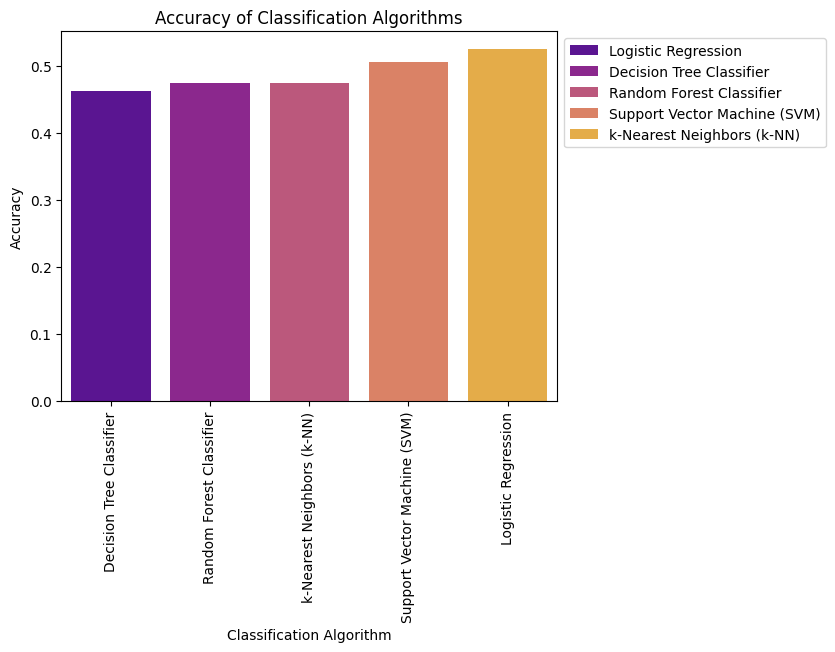

In [358]:
sns.barplot(x=sorted_accuracy_scores.keys(),y=sorted_accuracy_scores.values(),data=sorted_accuracy_scores,hue=accuracy_scores.keys(),palette="plasma")
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Algorithms')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) #legend loc outside top right corner

plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

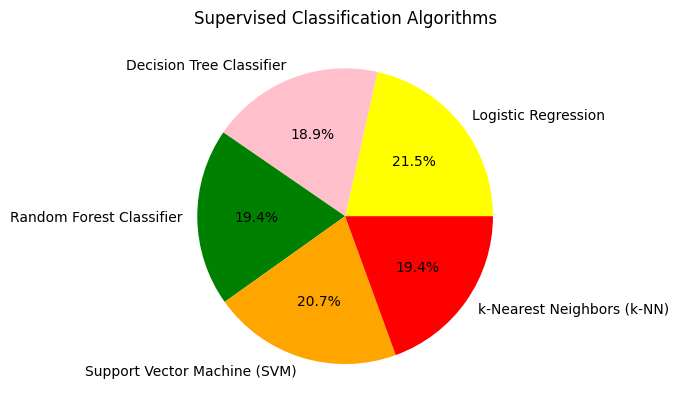

In [359]:
plt.pie(x=accuracy_scores.values(),labels=accuracy_scores.keys(),colors=["yellow", "pink", "green", "orange","red"], autopct="%1.1f%%")
plt.title("Supervised Classification Algorithms")
plt.show()

Hyperparameter tuning

In [360]:
from sklearn.model_selection import GridSearchCV

In [361]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],   # Regularization strength
    'penalty': ['l1', 'l2'],   # Regularization type
    'solver': ['liblinear']    # Suitable for small datasets & L1/L2 penalties
}

log_reg = LogisticRegression(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_new,y_resampled)

 #Get best model
best_log_reg = grid_search.best_estimator_

# Print best parameters
print(f" Best Hyperparameters: {grid_search.best_params_}")

# Evaluate the model
y_pred_logreg = best_log_reg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Tuned Logistic Regression Accuracy: {accuracy_logreg:.4f}\n")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


 Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.5250

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.62      0.60        92
           1       0.44      0.40      0.42        68

    accuracy                           0.53       160
   macro avg       0.51      0.51      0.51       160
weighted avg       0.52      0.53      0.52       160



In [362]:
#  Predict on unseen Test Data and Save Submission
y_unseen_pred = best_log_reg.predict(X_unseen)
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_unseen_pred
})

submission.to_csv('submission1.csv', index=False)
print("Submission saved as 'submission1.csv'")

Submission saved as 'submission1.csv'
